/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


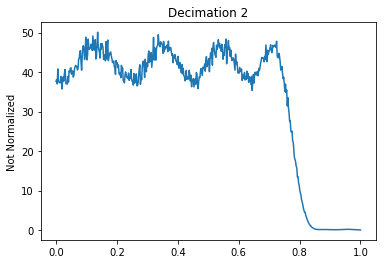

In [1]:
import pyJvsip as pv
%matplotlib inline
import matplotlib.pyplot as plt
N=1024
avg=1000
D=2
init=17
dataIn = pv.create('vview_f',D*N)
dataFFT = pv.create('cvview_f',int(N/2) + 1)
dataOut  = pv.create('vview_f',N)
spect_avg = pv.create('vview_f',int(N/2) + 1)
spect_new = pv.create('vview_f',int(N/2) + 1)
state = pv.Rand('NPRNG',N)
fft=pv.FFT('rcfftop_f',(N,1,0,0))
b = [0.0234, -0.0094, -0.0180, -0.0129,  0.0037, 
    0.0110, -0.0026, -0.0195, -0.0136,  0.0122,
    0.0232, -0.0007, -0.0314, -0.0223,  0.0250,
    0.0483, -0.0002, -0.0746, -0.0619,  0.0930,
    0.3023,  0.3999,  0.3023,  0.0930, -0.0619,
    -0.0746, -0.0002,  0.0483,  0.0250, -0.0223,
    -0.0314, -0.0007,  0.0232,  0.0122, -0.0136,
    -0.0195, -0.0026,  0.0110,  0.0037, -0.0129,
    -0.0180 ,-0.0094,  0.0234]
fir = pv.FIR('fir_f',pv.listToJv('vview_f',b),'NONE',D*N,D,'NO')
spect_avg.fill(0.0)
for i in range(avg):
    state.randu(dataIn)
    pv.add(-.5,dataIn,dataIn)
    fir.flt(dataIn,dataOut)
    fft.dft(dataOut,dataFFT)
    pv.cmagsq(dataFFT,spect_new)
    pv.add(spect_new,spect_avg,spect_avg)
pv.mul(1.0/avg,spect_avg,spect_avg);
#print("spect_avg =");spect_avg.mprint('%.4f')
x=spect_avg.empty.ramp(0,1.0/(spect_avg.length-1))
plt.plot(x.list,spect_avg.list)
plt.title('Decimation 2')
plt.ylabel('Not Normalized')